# MLADS 2019 - Deep Learning for NLP Applications: Part 3

# 1-D CNN's for Text Classification

## 1. Neural Network - Key components

#### Training a neural network revolves around the following objects:

- Layer, which are combined into a network or model
- Input data, and the corresponding targets
- Loss function, which defines the feedback signal
- Optimizer, which determines how the learning proceeds
 
    

### Relationship between network, layers, loss function and optimizer

![title](figures/NN_Anatomy_color.png)

## Layers: The building blocks of deep learning

- Layer is a data processing module that takes as input one or more tensors and outputs one or more tensors
- More frequently, layers have a state: layer's weights (learned via the optimizer)
- Types of Layers - Embedding, Densely connected, Dropout, convolutional, Pooling, Recurrent
- Layers are almost like LEGO bricks of deep learning, that is made explicit by Keras
- Layer compatibility refers to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape

#### Building deep learing models in Keras is done by joining together compatible layers to form useful data-transformation pipelines



#### Sequential model is a linear stack of layers

- You can instantiate a Sequential model object and then add layers using the .add() method

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Define the model architecture in terms of layers
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

#Print out the summary of the model
model.summary()

Using TensorFlow backend.
W1119 10:47:30.078114  3432 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 10:47:30.166323  3432 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 10:47:30.180380  3432 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# 2. ImDB Movie Reviews Classification with Convolutional Neural Networks

### Import needed packages

In [2]:
# import sequential model
from keras.models import Sequential

#import needed layers
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

# import dataset
from keras.datasets import imdb

# For preprocessing text
from keras.preprocessing import sequence

### Setting up parameters for reading the textual data

In [3]:
'''
max_features: Number of words to consider as features (Vocabulary)

maxlen: Cuts off text after this number of words (among the max_features most common words)

'''

# set parameters:
max_features = 5000
maxlen = 400


### Loading and preparing the data

In [4]:
'''
Load the data as a list of integers
'''

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


### Remarks

- The argument max_features = 5,000 means you will only keep the top 5,000 most frequently used words in the training data, and rare words will be discarded. 

- The argument maxlen = 400 means we will only keep the first 400 words in the review and postpad (or prepad) if the review is shorter than 400 words

- x_train and x_test are lists of reviews; each review is a list of word indices (encoding a sequence of words)

- y_train and y_test are lists of 0's and 1's (0: negative and 1: positive)

### Example to illustrate the preprocessing steps

![title](figures/preprocess_text.png)

## 2.1  Training and evaluating a simple 1D convnet on the IMDB data

### Illustration of the network architecture we will be using

![title](figures/network_architecture.png)

### Parameters of the Embedding layer

In [5]:
'''
embedding dims: Dimensionality of the vector representing each word
'''

embedding_dims = 50


In [6]:

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))


### Remarks

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

- __max_features__: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-5000, then the size of the vocabulary would be 5000 words.
- __embedding_dims__: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
- __input_length__: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are reduced to 400 words, this would be 400.

### Illustration of the embedding layer

![title](figures/embedding_layer.png)


The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.



### Parameters of the convolutional layer

In [7]:
num_filters = 250
kernel_size = 3

In [8]:
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(num_filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

![title](figures/conv_architecture.png)

In [9]:
hidden_dims = 250
epochs = 2
batch_size = 32

In [10]:
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims)) #hidden_dims = 250

model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

W1119 10:47:42.410364  3432 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1119 10:47:42.446510  3432 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W1119 10:47:42.462574  3432 deprecation.py:323] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1119 10:47:43.075802  3432 deprecation_wrapper.py:119] From C:\Users\fatajadd\AppData\Local\Continuum\anaconda3\lib\site-packa

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 90s 4ms/step - loss: 0.3923 - acc: 0.8093 - val_loss: 0.2828 - val_acc: 0.8802
Epoch 2/2
20000/20000 [==============================] - 90s 4ms/step - loss: 0.1925 - acc: 0.9243 - val_loss: 0.2726 - val_acc: 0.8898


### Plotting training and test accuracy

- The call to model.fit() returns a history object
- This has a member "history", which is a dictionary containing everything that happened during training

In [12]:
history_dict = history.history
history_dict.keys()
print(history_dict['acc'])

[0.80925, 0.9243]


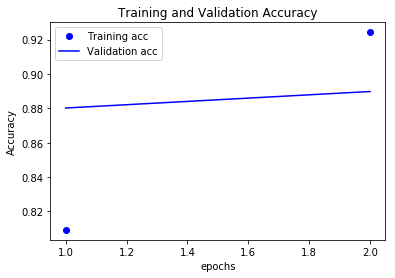

In [13]:
%matplotlib inline 

import matplotlib.pyplot as plt

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Why did we run only for 2 epochs? 

- Had already run it previously for 6 epochs, and this particular model starts overfitting after 2 epochs

![title](figures/acc_vs_epoch.png)


### Evaluating results on the test set

In [14]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 27s 1ms/step


In [15]:
results

[0.2743025794196129, 0.88748]